<a href="https://colab.research.google.com/github/lsergiotm/nlp/blob/main/Trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
# Carregar os dados
df = pd.read_csv('/content/sample_data/reviews_test_kaggle.csv')

In [3]:
# Visualizar as primeiras linhas do DataFrame
print("Primeiras linhas do DataFrame:")
print(df.head())

Primeiras linhas do DataFrame:
      id                                            content  \
0  30275                           deveria dar algum brinde   
1  10645                            Vendedor Giliard é show   
2  23204  muito ruim.. precisa fazer login com usuário e...   
3  25990  Se seu produto der defeito a  dor de cabeça é ...   
4   6001                          OS fretes são muito caros   

                    at      sortOrder  
0  2021-03-02 00:26:23  most_relevant  
1  2023-03-18 19:18:42         newest  
2  2020-06-16 09:23:53  most_relevant  
3  2015-07-20 16:25:26  most_relevant  
4  2021-04-08 14:48:32         newest  


In [4]:
# Informações gerais sobre o DataFrame
print("\nInformações Gerais do DataFrame:")
print(df.info())


Informações Gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57598 entries, 0 to 57597
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         57598 non-null  int64 
 1   content    57591 non-null  object
 2   at         57598 non-null  object
 3   sortOrder  57598 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.8+ MB
None


In [5]:
# Estatísticas descritivas básicas para colunas numéricas
print("\nEstatísticas Descritivas:")
print(df.describe())


Estatísticas Descritivas:
                 id
count  57598.000000
mean   28799.500000
std    16627.254739
min        1.000000
25%    14400.250000
50%    28799.500000
75%    43198.750000
max    57598.000000


In [6]:
# Verificar e contar valores nulos
print("\nValores Nulos no DataFrame:")
print(df.isnull().sum())


Valores Nulos no DataFrame:
id           0
content      7
at           0
sortOrder    0
dtype: int64


In [7]:
# Remover linhas com valores nulos na coluna 'content'
df.dropna(subset=['content'], inplace=True)

In [8]:
# Análise de texto - Comprimento do texto
df['text_length'] = df['content'].apply(len)

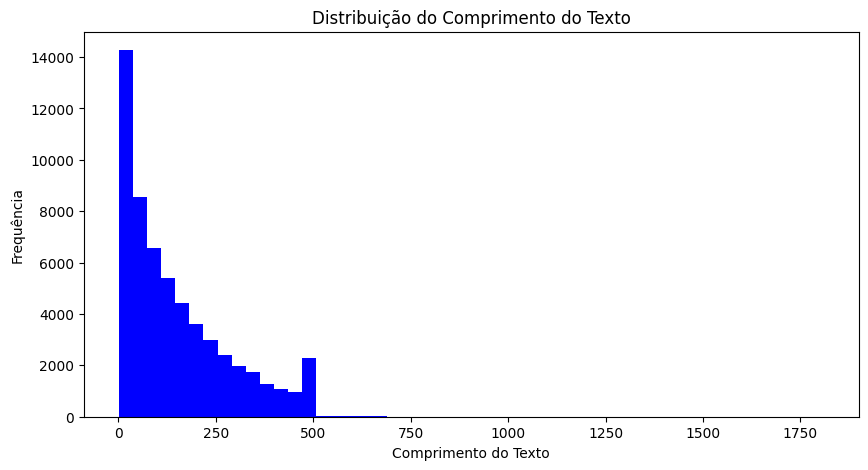

In [9]:
# Histograma do comprimento do texto
plt.figure(figsize=(10, 5))
plt.hist(df['text_length'], bins=50, color='blue')
plt.title('Distribuição do Comprimento do Texto')
plt.xlabel('Comprimento do Texto')
plt.ylabel('Frequência')
plt.show()

In [10]:
# Função para calcular o sentimento
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [11]:
# Aplicar função de sentimento ao DataFrame
df['sentiment_score'] = df['content'].apply(get_sentiment)

In [12]:
# Categorizar sentimentos
df['sentiment_category'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

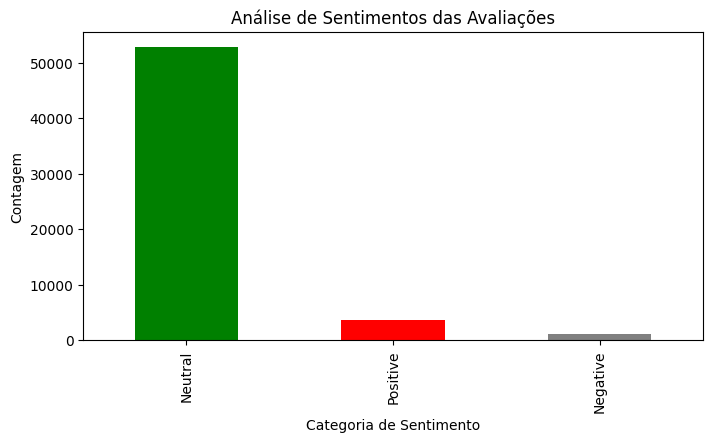

In [13]:
# Visualização dos sentimentos
plt.figure(figsize=(8, 4))
df['sentiment_category'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Análise de Sentimentos das Avaliações')
plt.xlabel('Categoria de Sentimento')
plt.ylabel('Contagem')
plt.show()

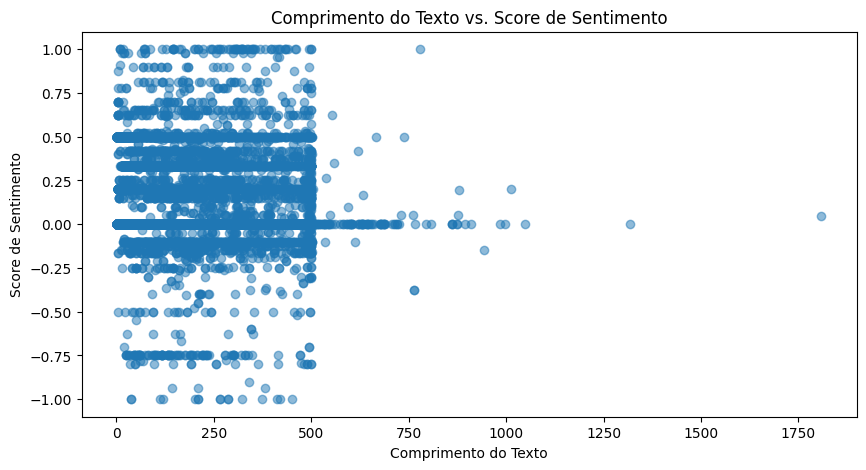

In [14]:
# Scatter plot de comprimento do texto por sentimento
plt.figure(figsize=(10, 5))
plt.scatter(df['text_length'], df['sentiment_score'], alpha=0.5)
plt.title('Comprimento do Texto vs. Score de Sentimento')
plt.xlabel('Comprimento do Texto')
plt.ylabel('Score de Sentimento')
plt.show()

In [15]:
# Correlação entre comprimento do texto e score de sentimento
correlation = df[['text_length', 'sentiment_score']].corr()
print("Coeficiente de Correlação:")
print(correlation)

Coeficiente de Correlação:
                 text_length  sentiment_score
text_length         1.000000         0.042082
sentiment_score     0.042082         1.000000


In [16]:
!pip install numpy
!pip install scipy
!pip install pandas
!pip install matplotlib seaborn
!pip install joblib

In [17]:
!pip install scikit-learn


In [18]:
import sklearn
print(sklearn.__version__)

1.2.2


In [19]:
!pip install pandas numpy matplotlib scikit-learn torch transformers

In [20]:
!pip install accelerate
!pip install transformers[torch]


In [21]:
!pip install transformers torch sklearn pandas

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [22]:
#Importação de bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

In [35]:
# Carregar os dados do CSV
df = pd.read_csv('/content/sample_data/reviews_test_kaggle.csv')

# Verificar as colunas do DataFrame
print(df.columns)

# Verificar as primeiras linhas do DataFrame
print(df.head())

# Remover linhas com valores nulos na coluna 'content'
df.dropna(subset=['content'], inplace=True)

Index(['id', 'content', 'at', 'sortOrder'], dtype='object')
      id                                            content  \
0  30275                           deveria dar algum brinde   
1  10645                            Vendedor Giliard é show   
2  23204  muito ruim.. precisa fazer login com usuário e...   
3  25990  Se seu produto der defeito a  dor de cabeça é ...   
4   6001                          OS fretes são muito caros   

                    at      sortOrder  
0  2021-03-02 00:26:23  most_relevant  
1  2023-03-18 19:18:42         newest  
2  2020-06-16 09:23:53  most_relevant  
3  2015-07-20 16:25:26  most_relevant  
4  2021-04-08 14:48:32         newest  


In [36]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Aplicar a função de análise de sentimento
df['sentiment'] = df['content'].apply(analyze_sentiment)

# Verificar a distribuição dos sentimentos
print(df['sentiment'].value_counts())

sentiment
neutral     52888
positive     3653
negative     1050
Name: count, dtype: int64


In [37]:
# Mapear sentimentos para rótulos numéricos
df['sentiment'] = df['sentiment'].map({'positive': 0, 'neutral': 1, 'negative': 2})

# Dividir os dados em conjuntos de treino e teste
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['content'], df['sentiment'], test_size=0.1, random_state=42
)

# Verificar se as divisões estão corretas
print(f"Train texts: {len(train_texts)}, Test texts: {len(test_texts)}")
print(f"Train labels: {len(train_labels)}, Test labels: {len(test_labels)}")


Train texts: 51831, Test texts: 5760
Train labels: 51831, Test labels: 5760


In [38]:
class ReviewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.tokenizer = tokenizer
        self.texts = texts
        self.labels = labels
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
          text,
          add_special_tokens=True,
          max_length=self.max_length,
          return_token_type_ids=False,
          padding='max_length',
          return_attention_mask=True,
          return_tensors='pt',
          truncation=True
        )

        return {
          'input_ids': encoding['input_ids'].flatten(),
          'attention_mask': encoding['attention_mask'].flatten(),
          'labels': torch.tensor(label, dtype=torch.long)
        }


In [39]:
# Inicializando o tokenizer e o dataset
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_length = 128  # Dependendo do tamanho médio dos seus textos
train_dataset = ReviewsDataset(train_texts.tolist(), train_labels.tolist(), tokenizer, max_length)
test_dataset = ReviewsDataset(test_texts.tolist(), test_labels.tolist(), tokenizer, max_length)


In [40]:
# Configuração do modelo BERT para classificação
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Configuração dos argumentos de treinamento
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

# Configuração do trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Treinamento do modelo
trainer.train()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
10,1.034900
20,0.954800
30,0.756100
40,0.613600
50,0.520900
60,0.340400
70,0.278900
80,0.396300
90,0.339400
100,0.362000


Step,Training Loss
10,1.034900
20,0.954800
30,0.756100
40,0.613600
50,0.520900
60,0.340400
70,0.278900
80,0.396300
90,0.339400
100,0.362000


KeyboardInterrupt: 

In [ ]:
# Avaliação do modelo
results = trainer.evaluate()
print(results)

# Prever no conjunto de teste
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=1)

# Relatório de classificação
print(classification_report(test_labels, preds, target_names=['positive', 'neutral', 'negative']))
